In [83]:
# Imports
from __future__          import division
import matplotlib.cm     as cm
import matplotlib.pyplot as plt
import numpy             as np
from random              import choice
%matplotlib inline

# Constants.
IRIS_TRAIN_FILE = "C:\\Users\\oop\\Desktop\\Winter 2016\\hw1_iris\\iris_train.data"
IRIS_TEST_FILE  = "C:\\Users\\oop\\Desktop\\Winter 2016\\hw1_iris\\iris_test.data"
CLASS_MAPPING   = {'Iris-setosa': 0, 
                   'Iris-versicolor':1
                  }

In [84]:
def get_iris_data(file_name):
    """
    This function reads the iris_data(train/test) file and returns
    numpy array of the data.
    """
    iris_data = []
    with open(file_name) as f:
        lines = f.read().split("\n")
        for line in lines:
            if not line:
                continue
            row = line.split(",")
            row[-1] = CLASS_MAPPING[row[-1]]
            iris_data.append(np.array(map(float, row)))
    iris_data = np.array(iris_data)
    return iris_data

def z_score(iris_data):
    """
    For input vector for each point it calculates z-score
    (xi - mean) / std
    """
    means = [iris_data[:,i].mean() for i in range(4)]
    stds  = [iris_data[:,i].std() for i in range(4)]
    return np.array([np.array([(X[i] - means[i]) / stds[i] 
                               for i in range(4)
                              ] + [X[-1]]
                             ) 
                     for X in iris_data]
                   )
        
    

In [85]:
iris_train_data = z_score(get_iris_data(IRIS_TRAIN_FILE))
iris_test_data = z_score(get_iris_data(IRIS_TEST_FILE))

#print iris_train_data
#print get_iris_data(IRIS_TRAIN_FILE)

In [86]:
def plot_spaces():
    sepal_length = iris_train_data[:,0]
    sepal_width  = iris_train_data[:,1]
    petal_length = iris_train_data[:,2]
    petal_width  = iris_train_data[:,3]
    plt.scatter(sepal_length, sepal_width, c=iris_train_data[:,-1], cmap=cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

    plt.scatter(sepal_length, petal_length, c=iris_train_data[:,-1], cmap=cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Petal length')
    plt.show()

    plt.scatter(sepal_length, petal_width, c=iris_train_data[:,-1], cmap=cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Petal Width')
    plt.show()

    plt.scatter(sepal_width, petal_length, c=iris_train_data[:,-1], cmap=cm.Paired)
    plt.xlabel('Sepal width')
    plt.ylabel('Petal length')
    plt.show()

    plt.scatter(sepal_width, petal_width, c=iris_train_data[:,-1], cmap=cm.Paired)
    plt.xlabel('Sepal width')
    plt.ylabel('Petal width')
    plt.show()

    plt.scatter(petal_length, petal_width, c=iris_train_data[:,-1], cmap=cm.Paired)
    plt.xlabel('Petal Length')
    plt.ylabel('Petal width')
    plt.show()

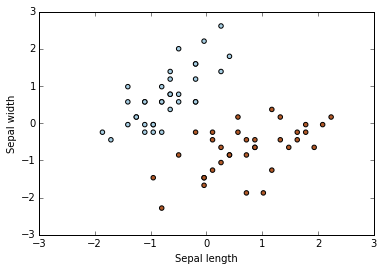

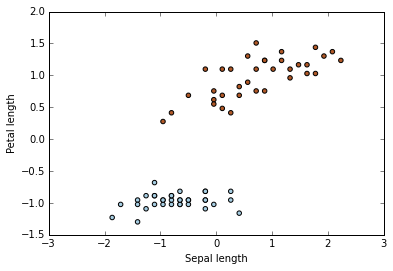

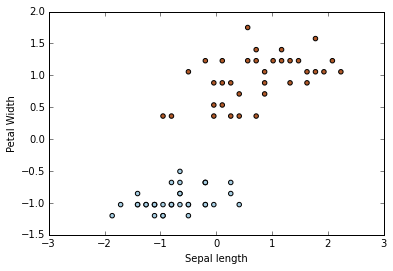

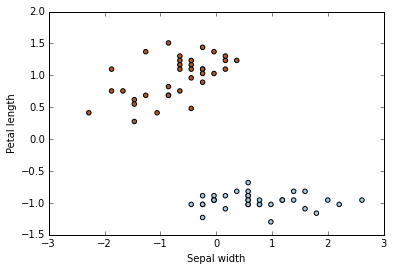

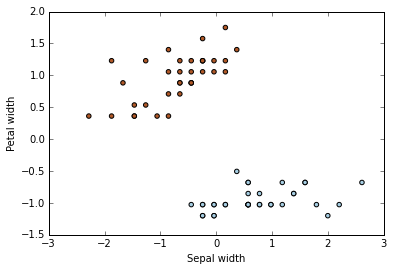

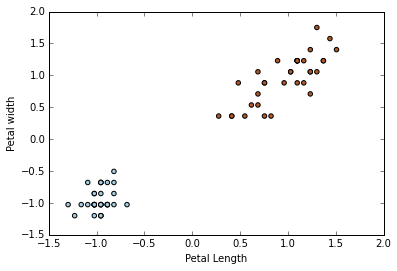

In [87]:
plot_spaces()

In [132]:
def activation(output):
    if output >= 0:
        return 1
    else:
        return 0

def train():
    weights = [0,0,0,0,0]
    errors = []
    alpha = 0.25
    max_iterations = 1000
    for i in xrange(max_iterations): 
        random_data = choice(iris_train_data)
        x = np.insert(random_data[:-1], 0, 1)
        teacher = random_data[-1]
        output = activation(np.dot(weights, x))
        error = teacher - output
        errors.append(error) 
        weights = weights + alpha * (teacher - output) * x
    return weights

In [133]:
weights = train()

In [134]:
def test():
    no_errors = 0
    for data in iris_test_data:
        x = np.insert(data[:-1], 0, 1)
        target = data[-1]
        predicted_output = activation(np.dot(weights, x))
        #print data, predicted_output
        if predicted_output != target:
            no_errors += 1
    return no_errors * 100 /len(iris_test_data)

In [135]:
error = test()
print "Error percentage is " + str(error)

Error percentage is 3.33333333333
